# Object Detection with Pre-trained Model


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_hub as hub

### Load image from assets for testing

In [2]:
def load_image(path):

    image = cv2.imread(path)

    # Convert image in BGR format to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Add a batch dimension which is required by the model.
    image = np.expand_dims(image, axis=0)

    return image

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

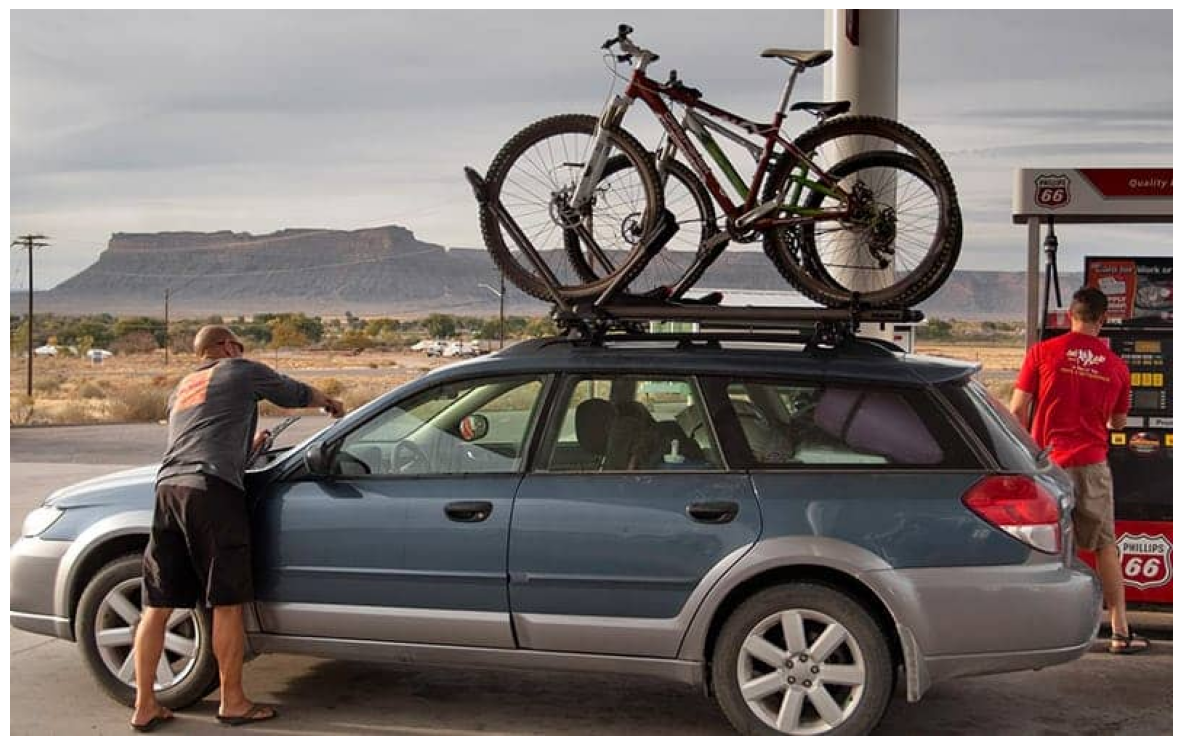

In [3]:
img = load_image('./assets/sample_image.jpg') 
plt.figure(figsize=[15, 10])
plt.imshow(img[0])
plt.axis('off')

## Define a Dictionary that Maps Class IDs to Class Names

class_index is a dictionary that maps class IDs to class names for the 90 classes in the COCO dataset.

In [4]:
class_index =  \
{
         1: 'person',
         2: 'bicycle',
         3: 'car',
         4: 'motorcycle',
         5: 'airplane',
         6: 'bus',
         7: 'train',
         8: 'truck',
         9: 'boat',
         10: 'traffic light',
         11: 'fire hydrant',
         13: 'stop sign',
         14: 'parking meter',
         15: 'bench',
         16: 'bird',
         17: 'cat',
         18: 'dog',
         19: 'horse',
         20: 'sheep',
         21: 'cow',
         22: 'elephant',
         23: 'bear',
         24: 'zebra',
         25: 'giraffe',
         27: 'backpack',
         28: 'umbrella',
         31: 'handbag',
         32: 'tie',
         33: 'suitcase',
         34: 'frisbee',
         35: 'skis',
         36: 'snowboard',
         37: 'sports ball',
         38: 'kite',
         39: 'baseball bat',
         40: 'baseball glove',
         41: 'skateboard',
         42: 'surfboard',
         43: 'tennis racket',
         44: 'bottle',
         46: 'wine glass',
         47: 'cup',
         48: 'fork',
         49: 'knife',
         50: 'spoon',
         51: 'bowl',
         52: 'banana',
         53: 'apple',
         54: 'sandwich',
         55: 'orange',
         56: 'broccoli',
         57: 'carrot',
         58: 'hot dog',
         59: 'pizza',
         60: 'donut',
         61: 'cake',
         62: 'chair',
         63: 'couch',
         64: 'potted plant',
         65: 'bed',
         67: 'dining table',
         70: 'toilet',
         72: 'tv',
         73: 'laptop',
         74: 'mouse',
         75: 'remote',
         76: 'keyboard',
         77: 'cell phone',
         78: 'microwave',
         79: 'oven',
         80: 'toaster',
         81: 'sink',
         82: 'refrigerator',
         84: 'book',
         85: 'clock',
         86: 'vase',
         87: 'scissors',
         88: 'teddy bear',
         89: 'hair drier',
         90: 'toothbrush'
}

Here we will use COLOR_IDS to map each class with a unique RGB color.

In [5]:
R = np.array(np.arange(96, 256, 32))
G = np.roll(R, 1)
B = np.roll(R, 2)

COLOR_IDS = np.array(np.meshgrid(R, G, B)).T.reshape(-1, 3)

## Model Inference using Tensorflow Hub

The EfficientDet family of object detectors consists of several models with different levels of complexity and performance, ranging from D0 to D7.

In [6]:
EfficientDet  = {'EfficientDet D0 512x512'   : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
                 'EfficientDet D1 640x640'   : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
                 'EfficientDet D2 768x768'   : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
                 'EfficientDet D3 896x896'   : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
                 'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
                 'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
                 'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
                 'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1'
                }

Here we will use the D4 model.

In [7]:
model_url = EfficientDet['EfficientDet D4 1024x1024' ]
model = hub.load(model_url)

## Perform Inference

Before we formalize the post-process of the results, let’s first see how to perform inference on a single image and study the output from the model.

In [8]:
results = model(img)

In [9]:
# Print the keys from the results dictionary.
for key in results:
    print(key)

raw_detection_boxes
detection_multiclass_scores
detection_classes
detection_boxes
raw_detection_scores
num_detections
detection_anchor_indices
detection_scores


In [10]:
results

{'raw_detection_boxes': <tf.Tensor: shape=(1, 196416, 4), dtype=float32, numpy=
 array([[[ 0.3099974 ,  0.00460931,  0.39222518,  0.00460931],
         [-0.01378875, -0.00161918,  0.03398079,  0.03381828],
         [-0.00848937, -0.00914898,  0.03508743,  0.05043946],
         ...,
         [ 0.63209265,  0.7228513 ,  1.2637508 ,  1.1201683 ],
         [ 0.5459974 ,  0.6620226 ,  1.3444597 ,  1.1660393 ],
         [ 0.43100458,  0.58130074,  1.4441204 ,  1.2341883 ]]],
       dtype=float32)>,
 'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 90), dtype=float32, numpy=
 array([[[9.2598897e-01, 1.8839623e-03, 4.7796823e-02, ...,
          1.1781210e-03, 9.4146136e-04, 1.1643026e-03],
         [8.7168688e-01, 4.7898083e-03, 1.4794267e-02, ...,
          2.0015091e-03, 1.1963857e-03, 1.2089704e-03],
         [1.8699946e-02, 1.1456021e-02, 8.6616564e-01, ...,
          2.4978729e-04, 6.3704513e-04, 1.4952265e-03],
         ...,
         [3.6352924e-03, 2.9502975e-02, 3.5330711e-03,

In [11]:
# Convert the dictionary values to numpy arrays.
results = {key:value.numpy() for key, value in results.items()}

In [12]:
results

{'raw_detection_boxes': array([[[ 0.3099974 ,  0.00460931,  0.39222518,  0.00460931],
         [-0.01378875, -0.00161918,  0.03398079,  0.03381828],
         [-0.00848937, -0.00914898,  0.03508743,  0.05043946],
         ...,
         [ 0.63209265,  0.7228513 ,  1.2637508 ,  1.1201683 ],
         [ 0.5459974 ,  0.6620226 ,  1.3444597 ,  1.1660393 ],
         [ 0.43100458,  0.58130074,  1.4441204 ,  1.2341883 ]]],
       dtype=float32),
 'detection_multiclass_scores': array([[[9.2598897e-01, 1.8839623e-03, 4.7796823e-02, ...,
          1.1781210e-03, 9.4146136e-04, 1.1643026e-03],
         [8.7168688e-01, 4.7898083e-03, 1.4794267e-02, ...,
          2.0015091e-03, 1.1963857e-03, 1.2089704e-03],
         [1.8699946e-02, 1.1456021e-02, 8.6616564e-01, ...,
          2.4978729e-04, 6.3704513e-04, 1.4952265e-03],
         ...,
         [3.6352924e-03, 2.9502975e-02, 3.5330711e-03, ...,
          1.0458715e-03, 9.3508203e-04, 6.0077797e-04],
         [8.8417456e-03, 3.9761852e-02, 1.8283945e-

In [13]:
print('Num Raw Detections: ', (len(results['raw_detection_scores'][0])))
print('Num Detections:     ', (results['num_detections'][0]).astype(int))

# Print the Scores, Classes and Bounding Boxes for the detections.
num_dets = (results['num_detections'][0]).astype(int)

print('\nDetection Scores: \n\n', results['detection_scores'][0][0:num_dets])
print('\nDetection Classes: \n\n', results['detection_classes'][0][0:num_dets])
print('\nDetection Boxes: \n\n', results['detection_boxes'][0][0:num_dets])

Num Raw Detections:  196416
Num Detections:      100

Detection Scores: 

 [0.925989   0.8716869  0.86616564 0.8575002  0.33463186 0.29798535
 0.24586682 0.13455367 0.12109814 0.11034076 0.1036584  0.09999373
 0.0993549  0.09068182 0.09036643 0.08821601 0.07510544 0.07430999
 0.07410838 0.07174783 0.06726819 0.06554586 0.06485186 0.0636474
 0.0623956  0.06130043 0.05731715 0.05592714 0.05569869 0.0553923
 0.0509171  0.04914293 0.04898948 0.04865314 0.04851007 0.04786514
 0.04760513 0.04734737 0.0466972  0.04645836 0.045947   0.04583612
 0.04564556 0.04530048 0.04420984 0.04408218 0.04382917 0.04366415
 0.04349133 0.04327003 0.04244078 0.04209927 0.04201362 0.04159221
 0.04080599 0.04044131 0.04000468 0.03987809 0.03976185 0.03852876
 0.03844989 0.03844073 0.03799018 0.03785534 0.03728438 0.03661443
 0.03586258 0.03584108 0.03530153 0.03518384 0.0350018  0.03498551
 0.03489019 0.03440667 0.03432383 0.03432118 0.03428794 0.03414218
 0.03371369 0.0337053  0.03314335 0.03307465 0.03296324 

In [14]:
# one element of output
print("detection_classes:",  results["detection_classes"][0][0], class_index[results["detection_classes"][0][0]])
print("detection_scores:",  results["detection_scores"][0][0])
print("detection_boxes [ymin, xmin, ymax, xmax]:",  results["detection_boxes"][0][0])

detection_classes: 1.0 person
detection_scores: 0.925989
detection_boxes [ymin, xmin, ymax, xmax]: [0.37121406 0.8591103  0.88786983 0.9764177 ]


In [15]:
scores  =  results['detection_scores'][0]
len(scores)

100

In [16]:
#apply minimum detection threshold 
min_det_thresh =0.3
det_indices = np.where(scores >= min_det_thresh)[0]

new_scores = scores[det_indices]
len(new_scores)

5

## Post-Process and Display Detections

Here we show the logic for how to interpret the detection data for a single image. As we showed above, the model returned 16 detections, however, many detections have low confidence scores, and we, therefore, need to filter these further by using a minimum detection threshold.

Retrieve the detections from the results dictionary
Apply a minimum detection threshold to filter the detections
For each thresholded detection, display the bounding box and a label indicating the detected class and the confidence of the detection.

In [17]:
def process_detection(image, results,  min_det_thresh=.3):

    # Convert the dictionary values to numpy arrays.
    results = {key:value.numpy() for key, value in results.items()}

    # Extract the detection results from the results dictionary.
    scores  =  results['detection_scores'][0]
    boxes   =  results['detection_boxes'][0]
    classes = (results['detection_classes'][0]).astype(int)

    # Get the detections whose scores exceed the minimum detection threshold.
    det_indices = np.where(scores >= min_det_thresh)[0]

    scores_thresh  = scores[det_indices]
    boxes_thresh   = boxes[det_indices]
    classes_thresh = classes[det_indices]

    # Make a copy of the image to annotate.
    img_bbox = image.copy()

    im_height, im_width = image.shape[:2]

    font_scale = .6
    box_thickness = 2

    # Loop over all thresholded detections.
    for box, class_id, score in zip(boxes_thresh, classes_thresh, scores_thresh):

        # Get bounding box normalized coordiantes.
        ymin, xmin, ymax, xmax = box

        class_name = class_index[class_id]

        # Convert normalized bounding box coordinates to pixel coordinates.
        (left, right, top, bottom) = (int(xmin * im_width),
                                      int(xmax * im_width),
                                      int(ymin * im_height),
                                      int(ymax * im_height))

        # Annotate the image with the bounding box.
        color = tuple(COLOR_IDS[class_id % len(COLOR_IDS)].tolist())[::-1]
        img_bbox = cv2.rectangle(img_bbox, (left, top), (right, bottom), color, thickness=box_thickness)

        #-------------------------------------------------------------------
        # Annotate bounding box with detection data (class name and score).
        #-------------------------------------------------------------------

        # Build the text string that contains the class name and score associated with this detection.
        display_txt = '{}: {:.2f}%'.format(class_name, 100 * score)
        ((text_width, text_height), _) = cv2.getTextSize(display_txt, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)

        # Handle case when the label is above the image frame.
        if top < text_height:
            shift_down = int(2*(1.3*text_height))
        else:
            shift_down = 0

        # Draw a filled rectangle on which the detection results will be displayed.
        img_bbox = cv2.rectangle(img_bbox,
                                 (left-1, top-box_thickness - int(1.3*text_height) + shift_down),
                                 (left-1 + int(1.1 * text_width), top),
                                 color,
                                 thickness=-1)

        # Annotate the filled rectangle with text (class label and score).
        img_bbox = cv2.putText(img_bbox,
                               display_txt,
                               (left + int(.05*text_width), top - int(0.2*text_height) + int(shift_down/2)),
                               cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), 1)
    return img_bbox

In [25]:
# Call the model.
results = model(img)

# Remove the batch dimension from the first image.
image = np.squeeze(img)

# Process the first sample image.
results_image = process_detection(image, results, min_det_thresh=0)

print(results_image)
print(results_image.shape)


[[[193 193 195]
  [193 193 195]
  [193 193 195]
  ...
  [154 153 159]
  [154 153 159]
  [154 153 159]]

 [[193 193 195]
  [193 193 195]
  [193 193 195]
  ...
  [154 153 159]
  [154 153 159]
  [154 153 159]]

 [[193 193 195]
  [193 193 195]
  [193 193 195]
  ...
  [154 153 159]
  [154 153 159]
  [154 153 159]]

 ...

 [[162 146 131]
  [162 146 131]
  [192  96  96]
  ...
  [ 91  78  70]
  [ 87  77  67]
  [ 85  75  65]]

 [[158 142 127]
  [159 143 128]
  [160 144 129]
  ...
  [ 97  84  76]
  [ 92  82  72]
  [ 89  79  69]]

 [[157 141 126]
  [158 142 127]
  [159 143 128]
  ...
  [102  89  81]
  [ 95  85  75]
  [ 91  81  71]]]
(500, 800, 3)


(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

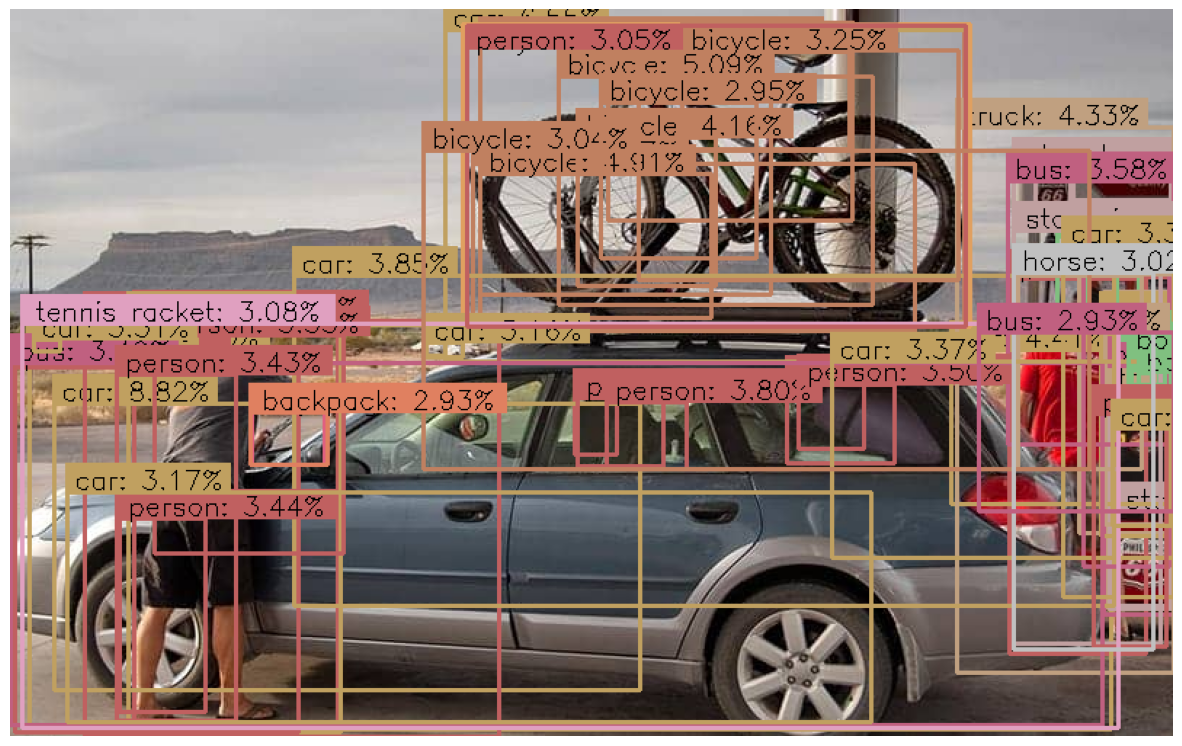

In [26]:
plt.figure(figsize=[15, 10])
plt.imshow(results_image)
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

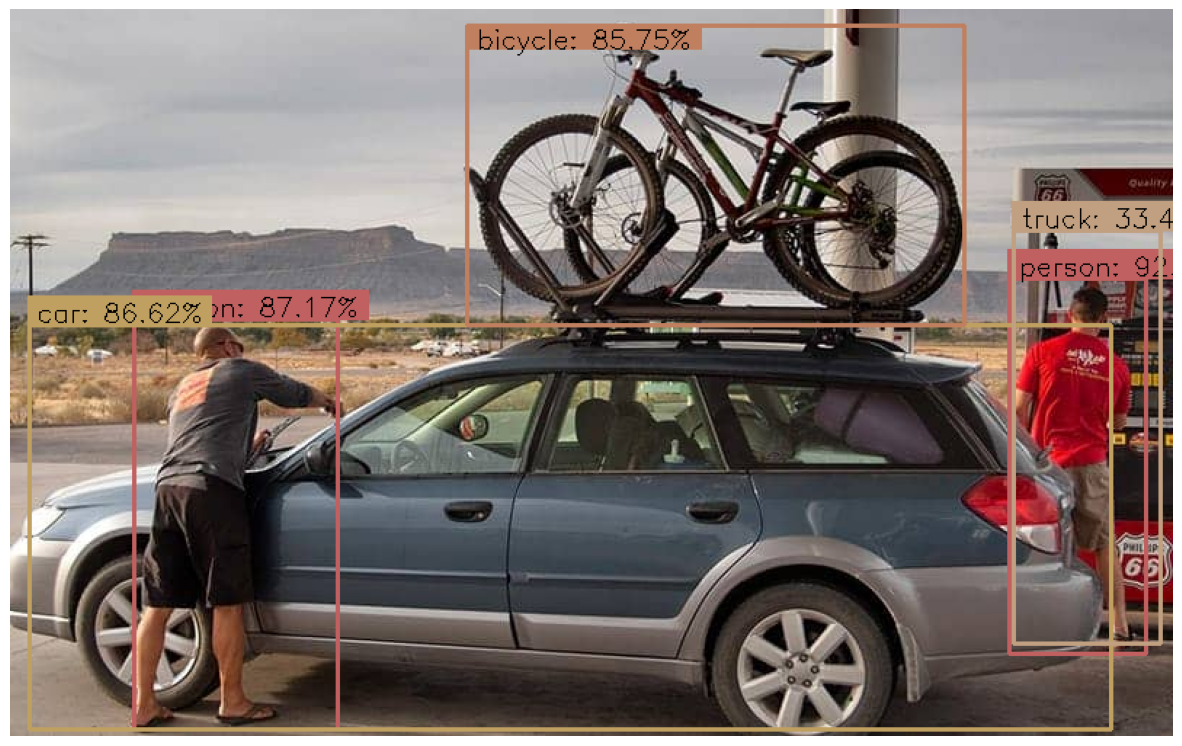

In [27]:
results_image = process_detection(image, results, min_det_thresh=.3)

plt.figure(figsize=[15, 10])
plt.imshow(results_image)
plt.axis('off')

## Deployment with Gradio

In [29]:
import gradio as gr

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
def detect(image, min_det_thresh):
  image = np.asarray(image)
  image = np.expand_dims(image, axis=0)

  # Call the model.
  results = model(image)

  #convert min_det_thresh scale
  min_det_thresh = min_det_thresh / 100.0

  results_image = process_detection(np.squeeze(image), results, min_det_thresh)

  return results_image

In [39]:
gr.close_all()
demo = gr.Interface(fn=detect, 
                    inputs=[gr.Image(label="update image", type="pil"),
                            gr.Slider(1, 100, value=30, label="Minimum Detection Threshold ")], 
                    outputs=[gr.Image(label="result", type="pil")], title="Object Detection", 
                    description="Object Detection with EfficientDets Model",
                    allow_flagging="never",)
demo.launch(share=True)

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860


/opt/anaconda3/envs/tf/lib/python3.12/site-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://172d18c698de53b1c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
#close Server
demo.close()

Closing server running on port: 7860
